# Preparation work

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
np.set_printoptions(suppress=True)

In [2]:
file_path = '/Users/roman.shipovskoy/Downloads/bquxjob_bcf5420_192d8cf3dda.csv'
df = pd.read_csv(file_path)

# Group overall analysis

In [3]:
# Group by 'abtest_group' to compare overall metrics for groups A and B
overall_summary = df.groupby('abtest_group').agg(
    total_unique_players=('unique_players', 'sum'),
    total_gameends=('total_gameends', 'sum'),
    total_purchases=('total_purchases', 'sum'),
    avg_days_before_purchase=('avg_days', 'mean')
).reset_index()

# Calculate averages per player for gameends and purchases
overall_summary['avg_gameends_per_player'] = overall_summary['total_gameends'] / overall_summary['total_unique_players']
overall_summary['avg_purchases_per_player'] = overall_summary['total_purchases'] / overall_summary['total_unique_players']

# Group by 'install_class' and 'abtest_group' to compare performance across legacy and new users
install_class_summary = df.groupby(['install_class', 'abtest_group']).agg(
    total_unique_players=('unique_players', 'sum'),
    total_gameends=('total_gameends', 'sum'),
    total_purchases=('total_purchases', 'sum'),
    avg_days_before_purchase=('avg_days', 'mean')
).reset_index()

# Calculate averages per player for gameends and purchases
install_class_summary['avg_gameends_per_player'] = install_class_summary['total_gameends'] / install_class_summary['total_unique_players']
install_class_summary['avg_purchases_per_player'] = install_class_summary['total_purchases'] / install_class_summary['total_unique_players']

# Group by 'purchase_date_check' and 'abtest_group' to compare purchase behavior between groups
purchase_behavior_summary = df.groupby(['purchase_date_check', 'abtest_group']).agg(
    total_unique_players=('unique_players', 'sum'),
    total_gameends=('total_gameends', 'sum'),
    total_purchases=('total_purchases', 'sum'),
    avg_days_before_purchase=('avg_days', 'mean')
).reset_index()

# Calculate averages per player for gameends and purchases
purchase_behavior_summary['avg_gameends_per_player'] = purchase_behavior_summary['total_gameends'] / purchase_behavior_summary['total_unique_players']
purchase_behavior_summary['avg_purchases_per_player'] = purchase_behavior_summary['total_purchases'] / purchase_behavior_summary['total_unique_players']



In [4]:
overall_summary

,abtest_group,total_unique_players,total_gameends,total_purchases,avg_days_before_purchase,avg_gameends_per_player,avg_purchases_per_player
0,A,99419615,1310623544,3026957,9.612666,13.182746,0.030446
1,B,24833647,321157226,810833,9.927863,12.932342,0.032651


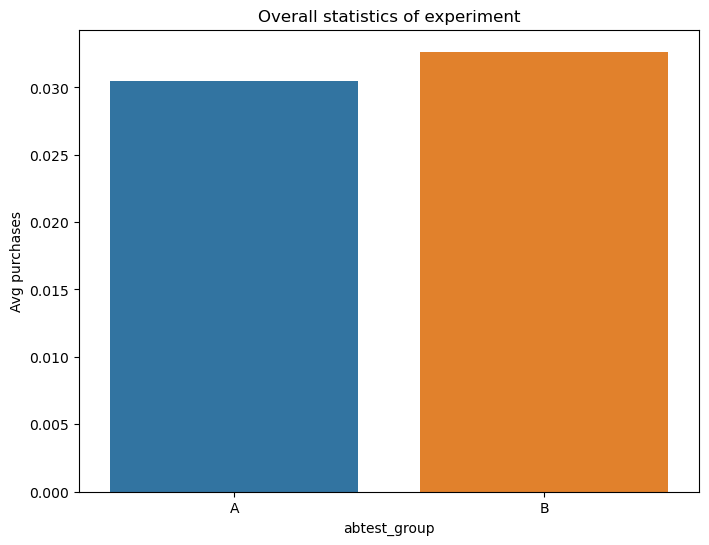

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(x='abtest_group', y='avg_purchases_per_player', hue = 'abtest_group', data=overall_summary)
plt.title('Overall statistics of experiment')
plt.ylabel('Avg purchases')
plt.show()


## Overall Performance:

- Group A (control) had significantly more unique players than Group B (experiment), as the test was distributed with an 80/20 split.
- Group B had a slightly higher average number of purchases per player compared to Group A (0.033 vs. 0.03), indicating that the new experience may be more effective at driving purchases.


Both groups had similar average game ends per player, with Group A having a slight edge (13.2 vs. 12.9). This suggests that players in Group A may be engaging with the game slightly more in terms of ending levels.

In [5]:

overall_summary_dates = df.groupby(['activity_date', 'abtest_group']).agg(
    total_unique_players=('unique_players', 'sum'),
    total_gameends=('total_gameends', 'sum'),
    total_purchases=('total_purchases', 'sum'),
    avg_days_for_purchase=('avg_days', 'mean')
).reset_index()

overall_summary_dates['avg_gameends'] = overall_summary_dates['total_gameends'] / overall_summary_dates['total_unique_players']
overall_summary_dates['avg_purchases'] = overall_summary_dates['total_purchases'] / overall_summary_dates['total_unique_players']

overall_summary_dates = overall_summary_dates.sort_values(by=['activity_date', 'abtest_group'])


overall_summary_dates['cumulative_total_unique_players'] = overall_summary_dates.groupby('abtest_group')['total_unique_players'].cumsum()
overall_summary_dates['cumulative_total_gameends'] = overall_summary_dates.groupby('abtest_group')['total_gameends'].cumsum()
overall_summary_dates['cumulative_total_purchases'] = overall_summary_dates.groupby('abtest_group')['total_purchases'].cumsum()


overall_summary_dates['cumulative_gameends_per_unique_player'] = overall_summary_dates['cumulative_total_gameends'] / overall_summary_dates['cumulative_total_unique_players']
overall_summary_dates['cumulative_purchases_per_unique_player'] = overall_summary_dates['cumulative_total_purchases'] / overall_summary_dates['cumulative_total_unique_players']




In [6]:
overall_summary_dates.head()

,activity_date,abtest_group,total_unique_players,total_gameends,total_purchases,avg_days_for_purchase,avg_gameends,avg_purchases,cumulative_total_unique_players,cumulative_total_gameends,cumulative_total_purchases,cumulative_gameends_per_unique_player,cumulative_purchases_per_unique_player
0,2017-05-04,A,5204864,68597770,159035,0.000000,13.179551,0.030555,5204864,68597770,159035,13.179551,0.030555
1,2017-05-04,B,1298934,17040715,41374,0.000000,13.119000,0.031852,1298934,17040715,41374,13.119000,0.031852
2,2017-05-05,A,5194697,68498045,158282,0.198090,13.186148,0.030470,10399561,137095815,317317,13.182846,0.030513
3,2017-05-05,B,1297264,16868794,43321,0.189664,13.003362,0.033394,2596198,33909509,84695,13.061218,0.032623
4,2017-05-06,A,5215813,68755819,158504,0.528245,13.182186,0.030389,15615374,205851634,475821,13.182626,0.030471


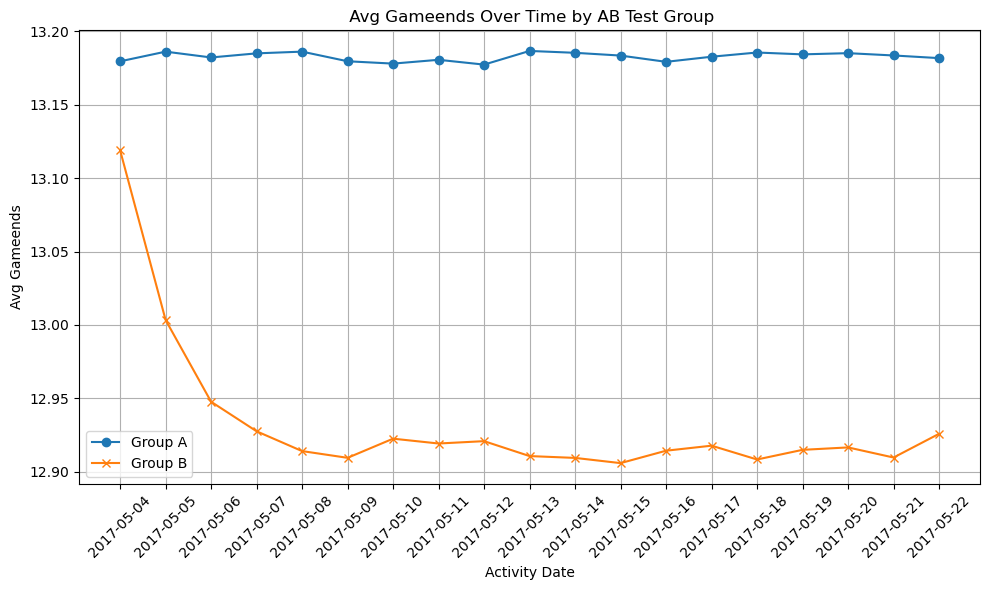

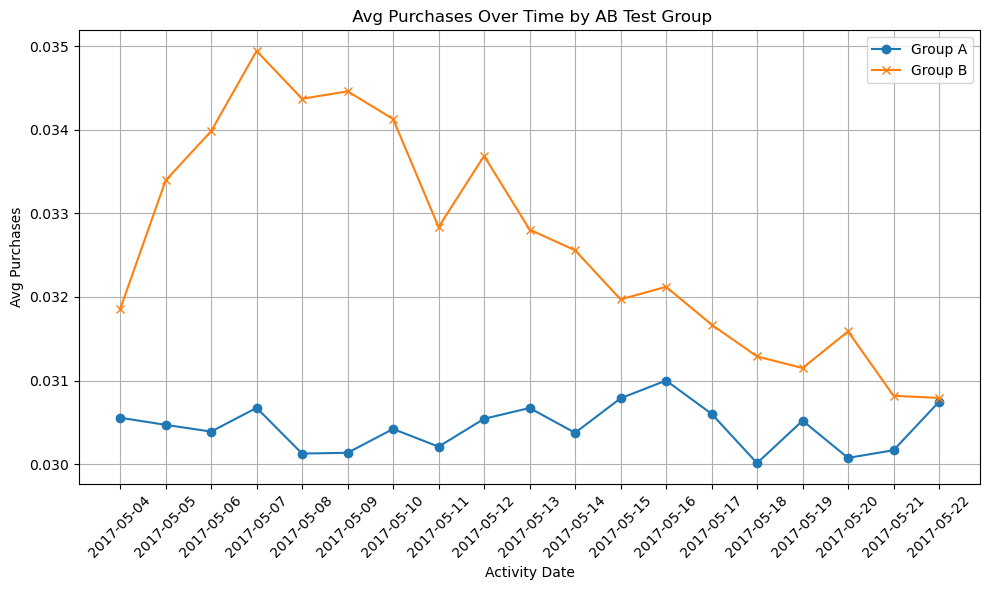

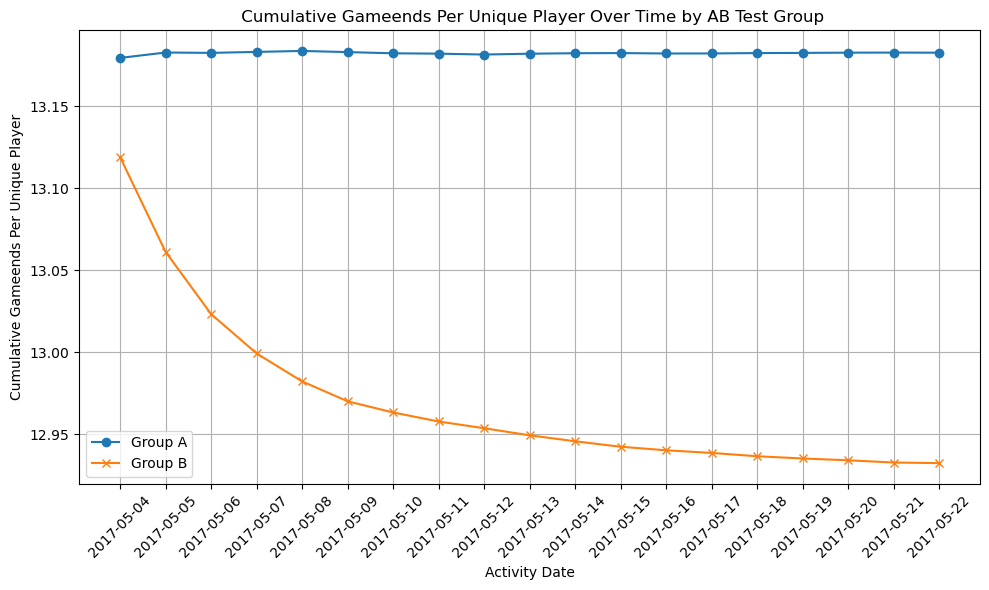

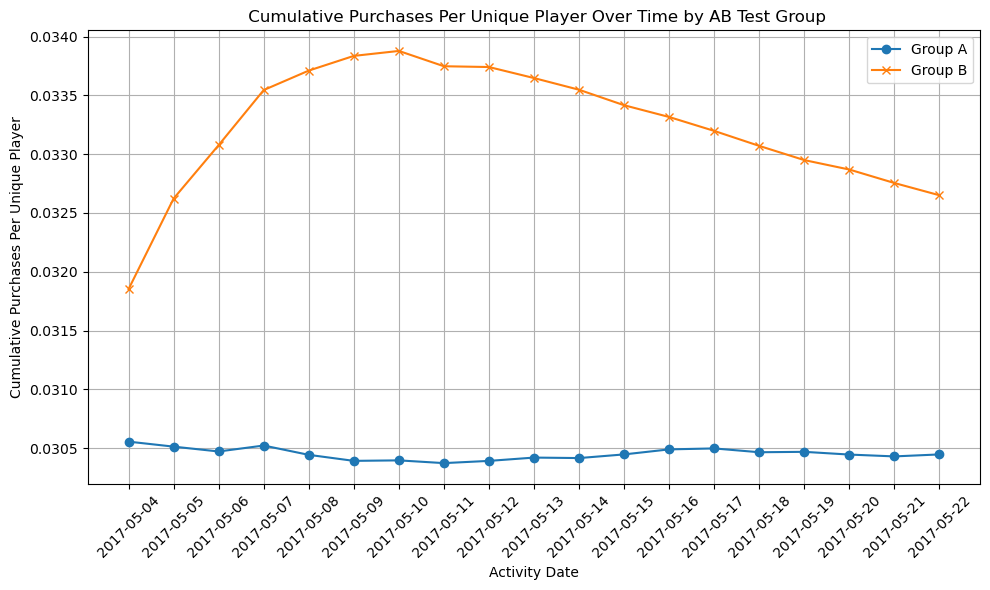

In [7]:
def plot_abtest_metrics(overall_summary_dates, metrics, title_prefix=''):
    for metric in metrics:
        pivot_df = overall_summary_dates.pivot(index='activity_date', columns='abtest_group', values=metric)
        
        if 'A' not in pivot_df.columns or 'B' not in pivot_df.columns:
            print(f"Skipping metric '{metric}' because one or both groups are missing.")
            continue
        
        plt.figure(figsize=(10, 6))
        plt.plot(pivot_df.index, pivot_df['A'], label='Group A', marker='o')
        plt.plot(pivot_df.index, pivot_df['B'], label='Group B', marker='x')
        
        plt.title(f'{title_prefix} {metric.replace("_", " ").title()} Over Time by AB Test Group')
        plt.xlabel('Activity Date')
        plt.ylabel(metric.replace("_", " ").title())
        plt.legend()
        plt.xticks(rotation=45)  
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()

metrics_to_plot = [
    'avg_gameends', 'avg_purchases', 
    'cumulative_gameends_per_unique_player', 'cumulative_purchases_per_unique_player'
]

plot_abtest_metrics(overall_summary_dates, metrics_to_plot)


**Plot 1**: Avg Gameends Over Time by AB Test Group
- Group A (blue) shows a consistent trend with very little fluctuation in average gameends over time, remaining around 13.15-13.20.
- Group B (orange) experiences a sharp decline at the beginning (from 13.10 to 12.90) over the first few days, then stabilizes around 12.90.


$Insight$: Group A performs better in terms of average gameends, while Group B shows a significant initial drop in engagement before leveling off at a lower rate.


**Plot 2**: Avg Purchases Over Time by AB Test Group
- Group B (orange) starts with a relatively high purchase rate, peaking at around 0.035, but steadily declines over time.
- Group A (blue) maintains a stable purchase rate, hovering around 0.030 throughout the period.

$Insight$: Group B shows better initial purchase behavior, but this advantage diminishes over time. Group A exhibits a lower but stable purchase behavior compared to Group B’s declining trend.




**Plot 3**: Cumulative Gameends Per Unique Player Over Time by AB Test Group
- Group A maintains a consistent rate of cumulative gameends per player, showing almost no decline.
- Group B shows a sharp decline over the first few days and then gradually levels off, similar to the first plot.


$Insight$: Group A demonstrates better sustained engagement in terms of gameends, while Group B suffers from a sharp initial drop-off, stabilizing at a lower engagement level later on.


**Plot 4**: Cumulative Purchases Per Unique Player Over Time by AB Test Group
- Group B starts higher and grows rapidly, but begins to decline after hitting a peak around 0.0335 cumulative purchases per unique player.
- Group A remains consistently lower throughout, with a very stable rate of around 0.030.


$Insight$: Group B starts with higher cumulative purchases but eventually sees a decline, while Group A remains steady with a slightly lower but more consistent performance.


**Overall Conclusions**:
- Engagement (Gameends): Group A consistently performs better in terms of gameends, showing steady engagement, while Group B sees an early sharp decline and stabilizes at a lower level. Maybe it is due to less complicated game experience
- Purchases: Group B initially has a higher purchase rate and cumulative purchases, but this advantage diminishes over time. Group A, while starting lower, maintains a more consistent purchase behavior over time.

These trends suggest that Group A performs more consistently across gameends and purchases, while Group B sees higher initial performance but experience a decline in both engagement and purchase behavior over time.






# Statiscal comparison of 2 groups:

In [8]:
# Assuming  dataframe is 'df' with 'group' and 'purchase_per_player' columns
group1 = overall_summary_dates[overall_summary_dates['abtest_group'] == 'A']['avg_purchases']
group2 = overall_summary_dates[overall_summary_dates['abtest_group'] == 'B']['avg_purchases']

# Check for normality
print(stats.shapiro(group1))
print(stats.shapiro(group2))

# If normal, conduct independent t-test
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)  # Set equal_var=False for Welch's t-test
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# If not normal, conduct Mann-Whitney U test
u_stat, p_value = stats.mannwhitneyu(group1, group2)
print(f"U-statistic: {u_stat}, P-value: {p_value}")
plt.show()


ShapiroResult(statistic=0.9675497247428111, pvalue=0.7266098166833092)
ShapiroResult(statistic=0.9416544301332014, pvalue=0.28236410613418705)
T-statistic: -7.119439879658678, P-value: 7.737229362024911e-07
U-statistic: 2.0, P-value: 2.0289552019499924e-07


1. Shapiro-Wilk Test Results:
The ShapiroResult is the output of a Shapiro-Wilk test, which is used to test for normality in a dataset.

First ShapiroResult(statistic=0.9675, pvalue=0.7266):

Statistic (0.9675): This is the test statistic, which indicates how close the sample distribution is to a normal distribution. A value close to 1 suggests the data is likely normal.
P-value (0.7266): This is the probability of observing a test statistic as extreme as, or more extreme than, the observed value, assuming that the null hypothesis (the data is normally distributed) is true. Since the p-value is greater than 0.05 (typically the threshold for significance), we fail to reject the null hypothesis, meaning that the data likely comes from a normal distribution.
Second ShapiroResult(statistic=0.9417, pvalue=0.2824):

Statistic (0.9417): Again, a value close to 1 suggests the data is likely normal, but this one is slightly lower than the first result.
P-value (0.2824): Like the first result, the p-value is greater than 0.05, meaning we fail to reject the null hypothesis, and the data likely comes from a normal distribution, though it's not as strong as the first case.

2. T-test Result:
T-statistic (-7.1194): This is the test statistic for a t-test, which is used to compare the means of two groups (assuming normality). A negative value indicates that the first group's mean is lower than the second group's mean.

P-value (7.737229e-07): This is the probability of obtaining a result as extreme as, or more extreme than, the observed result, assuming the null hypothesis (that the means of both groups are equal) is true. Since this p-value is extremely small (much smaller than 0.05), we reject the null hypothesis, meaning there is strong evidence that the two groups have significantly different means.

3. Mann-Whitney U Test Result:
U-statistic (2.0): This is the test statistic for a Mann-Whitney U test, a non-parametric test used to compare two independent groups when the normality assumption doesn't hold.

P-value (2.028955e-07): This is the probability of observing a test statistic as extreme as, or more extreme than, the observed value under the null hypothesis (that the two groups are equal). Since this p-value is also extremely small, we reject the null hypothesis, suggesting that there is a significant difference between the two groups.

Summary:
The Shapiro-Wilk test results suggest that the data in both cases is likely normally distributed.
The t-test and Mann-Whitney U test both show strong evidence of a significant difference between two groups.
The t-test assumes normality, and its result aligns with the Mann-Whitney U test (which does not assume normality), both pointing toward a significant difference between the groups.



**Thus, we can conclude, that there is a statistical significant difference between two groups (B performing better) in terms of average number of purchases made per player**

# Here i add few more categories

I will not focus on this part, it might be interesting, but also can be affected by Simpson's Paradox. This occurs when a trend that appears in different groups of data reverses or disappears when the groups are combined or when the granularity changes. In AB testing or data analysis, changing the granularity of groups—such as aggregating or disaggregating data—can lead to misleading interpretations because the relationships between variables might behave differently at different levels of aggregation.

as it was not specified, whether i need to focus on groups or not, this works as some extra-info source

**User type**

- **Legacy user** is a user, that first downloaded the game more than 1 month before experiment
- **New user** is a user, who downloaded it 1 month or less before the experiment

**Purchase type**

- made_purchase_before_test
- made_purchase_during_test
- never_made_purchase

here everthing should be clear 

In [9]:
install_class_summary

,install_class,abtest_group,total_unique_players,total_gameends,total_purchases,avg_days_before_purchase,avg_gameends_per_player,avg_purchases_per_player
0,legacy_user,A,77205983,1017759747,2345423,10.054146,13.182395,0.030379
1,legacy_user,B,19283629,249365438,632994,10.314620,12.931458,0.032825
2,new_user,A,22213632,292863797,681534,9.171187,13.183967,0.030681
3,new_user,B,5550018,71791788,177839,9.547891,12.935415,0.032043


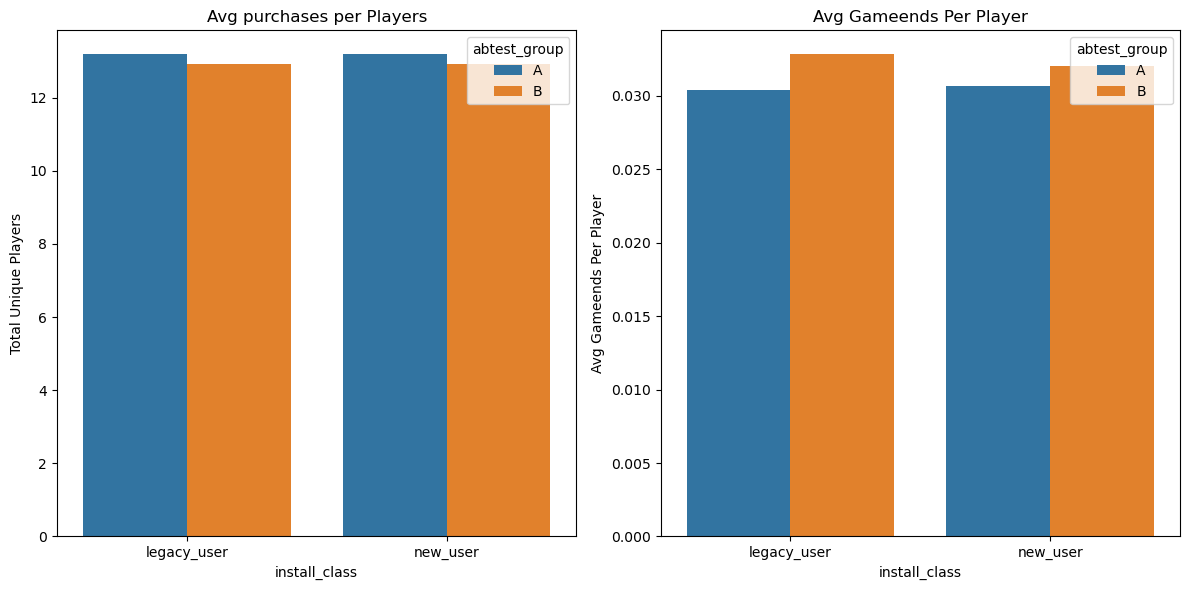

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize to control the size
#Avg purchases per Players
sns.barplot(x='install_class', y='avg_gameends_per_player', hue='abtest_group', data=install_class_summary, ax=axes[0])
axes[0].set_title('Avg purchases per Players')
axes[0].set_ylabel('Total Unique Players')

# Plot 2: Avg Gameends Per Player
sns.barplot(x='install_class', y='avg_purchases_per_player', hue='abtest_group',  data=install_class_summary, ax=axes[1])
axes[1].set_title('Avg Gameends Per Player')
axes[1].set_ylabel('Avg Gameends Per Player')

# Adjust layout
plt.tight_layout()
plt.show()

Install Class (Legacy vs New Users):

 - Legacy users in Group B had lower average game ends and purchases compared to Group A, indicating that the new experience might not have resonated as well with legacy users.
 - New users in Group B had higher average purchases (0.033 vs. 0.03 in Group A), suggesting that the new experience may be more effective at encouraging purchases among new players.

In [11]:
purchase_behavior_summary

,purchase_date_check,abtest_group,total_unique_players,total_gameends,total_purchases,avg_days_before_purchase,avg_gameends_per_player,avg_purchases_per_player
0,made_purchase_before_test,A,2681780,35367505,2799245,19.901572,13.188071,1.043801
1,made_purchase_before_test,B,664034,8639559,751515,20.624741,13.010718,1.131742
2,made_purchase_during_test,A,128729,1436843,52616,8.915636,11.161766,0.408735
3,made_purchase_during_test,B,33109,356910,14292,9.116437,10.779848,0.431665
4,never_made_purchase,A,96609106,1273819196,175096,0.020791,13.185291,0.001812
5,never_made_purchase,B,24136504,312160757,45026,0.021057,12.933139,0.001865


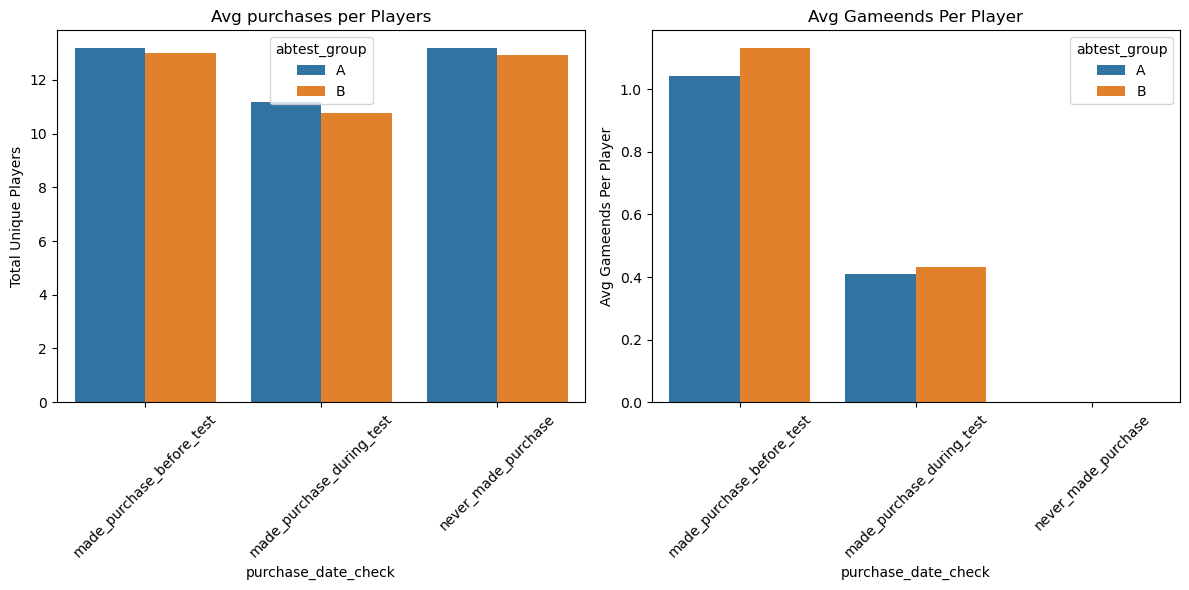

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize to control the size
#Avg purchases per Players
sns.barplot(x='purchase_date_check', y='avg_gameends_per_player', hue='abtest_group', data=purchase_behavior_summary, ax=axes[0])
axes[0].set_title('Avg purchases per Players')
axes[0].set_ylabel('Total Unique Players')
axes[0].tick_params(axis='x', rotation=45) 

# Plot 2: Avg Gameends Per Player
sns.barplot(x='purchase_date_check', y='avg_purchases_per_player', hue='abtest_group',  data=purchase_behavior_summary, ax=axes[1])
axes[1].set_title('Avg Gameends Per Player')
axes[1].set_ylabel('Avg Gameends Per Player')
axes[1].tick_params(axis='x', rotation=45) 
# Adjust layout

plt.tight_layout()
plt.show()

Purchase Behavior:

 - In both groups, players who made purchases before the test had significantly higher game ends and purchases compared to those who made purchases during the test or never made a purchase.
 - Players in Group B who made purchases before the test spent more on average than their counterparts in Group A (1.13 vs. 1.04).
 - Group B's players who never made a purchase had a slightly lower average game ends compared to Group A (12.94 vs. 13.19), indicating that the new experience may not be as engaging for players who do not make purchases. (or they just pass levels quicker)
